<a href="https://colab.research.google.com/github/naveen-ramavath/machine-learning/blob/main/ml_week_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df = pd.read_csv("/content/KaggleV2-May-2016.csv.zip")
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_classif, f_regression, chi2, mutual_info_classif, mutual_info_regression
from sklearn.metrics import roc_auc_score, mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df['No-show'] = df['No-show'].map({'No': 0, 'Yes': 1})

# Drop unused columns
df.drop(columns=['PatientId', 'AppointmentID', 'ScheduledDay', 'AppointmentDay'], inplace=True)

# Label encode categorical columns
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])  # F=0, M=1
df['Neighbourhood'] = le.fit_transform(df['Neighbourhood'])

# Define features and target
X = df.drop('No-show', axis=1)
y = df['No-show']

In [ ]:
#constant features
c=[col for col in df.columns if df[col].nunique()==1]
print(c)

[]


In [ ]:
#quasi constant
threshold=0.99
qc=[]
for col in df.columns:
  freq=df[col].value_counts(normalize=True).values[0]
  if freq>threshold:
    qc.append(col)
print(qc)




[]


In [ ]:
#duplicates
duplicated=df[df.duplicated()]
print(duplicated)

Empty DataFrame
Columns: [PatientId, AppointmentID, Gender, ScheduledDay, AppointmentDay, Age, Neighbourhood, Scholarship, Hipertension, Diabetes, Alcoholism, Handcap, SMS_received, No-show]
Index: []


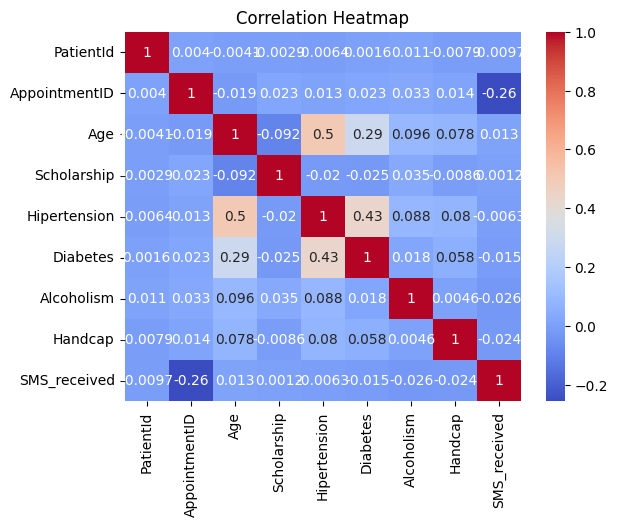

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation matrix
corr_matrix = df.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [ ]:
from sklearn.feature_selection import mutual_info_classif

mi_scores = mutual_info_classif(X, y)
mi_df = pd.DataFrame({'Feature': X.columns, 'MI Score': mi_scores})
mi_df = mi_df.sort_values(by='MI Score', ascending=False)

print("\nMutual Information Scores:")
print(mi_df)



Mutual Information Scores:
         Feature  MI Score
8   SMS_received  0.012688
0         Gender  0.005003
1            Age  0.004191
4   Hipertension  0.002388
5       Diabetes  0.001854
2  Neighbourhood  0.001761
3    Scholarship  0.001111
6     Alcoholism  0.000833
7        Handcap  0.000000


week 4 lab

In [50]:
import pandas as pd
df=pd.read_csv("/content/drive/MyDrive/Datasets/house_price_train.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [52]:
df.ffill()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Pave,Reg,Lvl,AllPub,...,0,Gd,GdWo,TenC,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,Pave,Reg,Lvl,AllPub,...,0,Gd,MnPrv,TenC,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,Pave,Reg,Lvl,AllPub,...,0,Gd,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,Pave,Reg,Lvl,AllPub,...,0,Gd,GdPrv,Shed,0,4,2010,WD,Normal,142125


In [53]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Remove columns with more than 50% null values (you can change the threshold)
threshold = 0.5  # 50% null allowed, anything more will be dropped
X_train = X_train.loc[:, X_train.isnull().mean() < threshold]

# Now convert strings to numeric (label encoding for example)
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for col in X_train.columns:
    if X_train[col].dtype == 'object':  # check if column is string
        le = LabelEncoder()
        X_train[col] = le.fit_transform(X_train[col].astype(str))
        label_encoders[col] = le

X_train.head()


/tmp/ipython-input-2001738661.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[col] = le.fit_transform(X_train[col].astype(str))
/tmp/ipython-input-2001738661.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[col] = le.fit_transform(X_train[col].astype(str))
/tmp/ipython-input-2001738661.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
254,255,20,3,70.0,8400,1,3,3,0,4,...,0,0,0,0,0,0,6,2010,8,4
1066,1067,60,3,59.0,7837,1,0,3,0,4,...,40,0,0,0,0,0,5,2009,8,4
638,639,30,3,67.0,8777,1,3,3,0,4,...,0,164,0,0,0,0,5,2008,8,4
799,800,50,3,60.0,7200,1,3,3,0,0,...,0,264,0,0,0,0,6,2007,8,4
380,381,50,3,50.0,5000,1,3,3,0,4,...,0,242,0,0,0,0,5,2010,8,4


In [54]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [55]:
df=df.select_dtypes(include=['float64','int64'])

In [56]:
X=df.drop("SalePrice",axis=1)

In [57]:
y=df['SalePrice']

In [58]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [59]:
import numpy as np
const_features=[
    col for col in X_train.select_dtypes(include = np.number).columns
    if X_train[col].std() == 0
]
len(const_features)

0

In [65]:
#quasi constant
threshold=0.99
qc=[]
for col in X_train.columns:
  freq=X_train[col].value_counts(normalize=True).values[0]
  if freq>threshold:
    qc.append(col)
print(qc)
X_train.drop(columns=qc,inplace=True)

[]


In [66]:
duplicated_fea=[]
for i in range(len(X_train.columns)):
  col1 = X_train.columns[i]
  for col2 in X_train.columns[i+1:]:
    if X_train[col1].equals(X_train[col2]):
      duplicated_fea.append(col2)
print(f"Duplicated feATURES: {duplicated_fea}")
X_train.drop(columns=duplicated_fea,inplace=True)

Duplicated feATURES: []


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,KitchenAbvGr,Fireplaces,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MiscVal,MoSold,YrSold
Id,1.00,0.00,-0.00,-0.03,-0.02,0.03,-0.02,-0.03,-0.02,-0.01,...,-0.01,-0.03,0.02,-0.01,0.01,0.01,-0.00,-0.01,0.01,0.00
MSSubClass,0.00,1.00,-0.37,-0.12,0.03,-0.05,-0.00,0.04,-0.01,-0.08,...,0.31,-0.05,-0.04,-0.02,-0.01,-0.01,-0.03,-0.01,-0.01,-0.03
LotFrontage,-0.00,-0.37,1.00,0.43,0.25,-0.05,0.12,0.09,0.22,0.24,...,-0.01,0.27,0.28,0.08,0.14,-0.00,0.05,0.00,0.02,0.00
LotArea,-0.03,-0.12,0.43,1.00,0.10,0.00,0.01,0.02,0.13,0.22,...,-0.03,0.27,0.15,0.18,0.09,-0.02,0.05,0.04,0.00,-0.01
OverallQual,-0.02,0.03,0.25,0.10,1.00,-0.09,0.56,0.54,0.42,0.20,...,-0.19,0.38,0.59,0.23,0.29,-0.12,0.06,-0.03,0.05,-0.02
OverallCond,0.03,-0.05,-0.05,0.00,-0.09,1.00,-0.39,0.06,-0.14,-0.04,...,-0.07,-0.00,-0.17,-0.01,-0.03,0.07,0.06,0.08,0.01,0.02
YearBuilt,-0.02,-0.00,0.12,0.01,0.56,-0.39,1.00,0.59,0.32,0.22,...,-0.20,0.13,0.53,0.22,0.18,-0.39,-0.05,-0.03,0.01,0.00
YearRemodAdd,-0.03,0.04,0.09,0.02,0.54,0.06,0.59,1.00,0.16,0.10,...,-0.15,0.10,0.41,0.21,0.22,-0.21,-0.06,-0.01,0.03,0.05
MasVnrArea,-0.02,-0.01,0.22,0.13,0.42,-0.14,0.32,0.16,1.00,0.24,...,-0.03,0.25,0.37,0.17,0.12,-0.13,0.06,-0.03,0.00,0.01
BsmtFinSF1,-0.01,-0.08,0.24,0.22,0.20,-0.04,0.22,0.10,0.24,1.00,...,-0.09,0.24,0.20,0.19,0.09,-0.12,0.05,0.00,-0.01,0.03


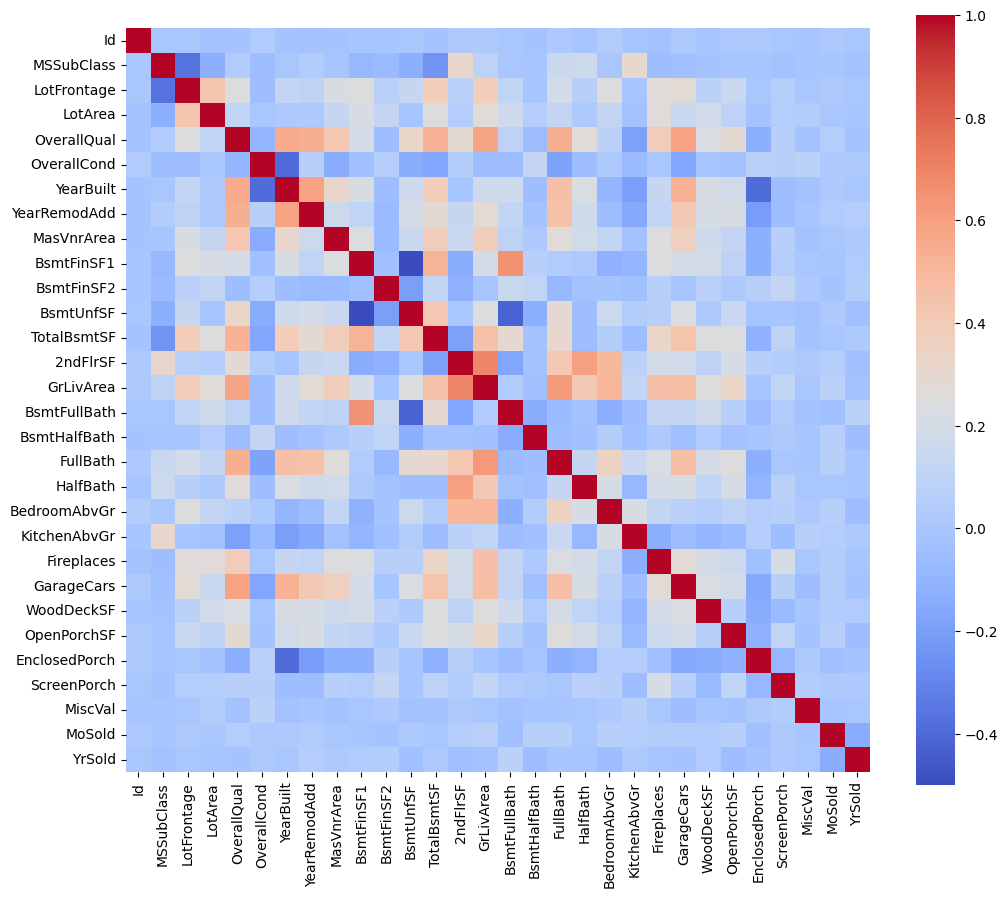

In [69]:
import numpy as np
numeric_X_train = X_train.select_dtypes(include=np.number)
corrmat = numeric_X_train.corr().round(2)
plt.figure(figsize=(12,10))
sns.heatmap(corrmat,cmap='coolwarm',annot=False , square =True,cbar=True)
corrmat

In [68]:
# Set the correlation threshold
threshold = 0.8  # you can adjust this

# Find correlated pairs
corr_matrix = X_train.corr().abs()  # absolute correlation values
upper_tri = corr_matrix.where(
    np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)
)

# List of columns to drop
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > threshold)]

print(f"Highly correlated features to drop: {to_drop}")

# Drop them
X_train.drop(columns=to_drop, inplace=True)
X_test.drop(columns=to_drop, inplace=True)


Highly correlated features to drop: ['1stFlrSF', 'TotRmsAbvGrd', 'GarageYrBlt', 'GarageArea']


In [70]:
import pandas as pd

Xy_train = X_train.copy()
Xy_train['Target'] = y_train

correlation_with_target = Xy_train.corr()['Target'].sort_values(ascending=False)
print(correlation_with_target)

Target           1.000000
OverallQual      0.785555
GrLivArea        0.695652
GarageCars       0.640991
TotalBsmtSF      0.597766
FullBath         0.552546
YearBuilt        0.516501
YearRemodAdd     0.508593
MasVnrArea       0.459123
Fireplaces       0.457549
BsmtFinSF1       0.359460
LotFrontage      0.330066
WoodDeckSF       0.329843
2ndFlrSF         0.314030
OpenPorchSF      0.299969
HalfBath         0.280481
LotArea          0.266204
BsmtFullBath     0.226346
BsmtUnfSF        0.222487
BedroomAbvGr     0.156211
ScreenPorch      0.119172
MoSold           0.041890
BsmtFinSF2      -0.005731
YrSold          -0.009099
Id              -0.019643
MiscVal         -0.020179
BsmtHalfBath    -0.048346
OverallCond     -0.074391
MSSubClass      -0.088081
KitchenAbvGr    -0.142785
EnclosedPorch   -0.149532
Name: Target, dtype: float64
